In [54]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score,roc_auc_score,make_scorer
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [55]:
df = pd.read_csv('ObesityRaw.csv')

In [56]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [57]:
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [58]:
x = df.drop('NObeyesdad', axis=1).copy()
x.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation


In [59]:
y = df['NObeyesdad'].copy()
y.head()

0          Normal_Weight
1          Normal_Weight
2          Normal_Weight
3     Overweight_Level_I
4    Overweight_Level_II
Name: NObeyesdad, dtype: object

In [60]:
x_encoded = pd.get_dummies(x, columns=['Gender',
                                        'family_history_with_overweight',
                                        'FAVC',
                                        'CAEC',
                                        'SMOKE',
                                        'SCC',
                                        'CALC',
                                        'MTRANS'])  

x_encoded.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,True,False,...,False,False,False,False,True,False,False,False,True,False
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,True,False,...,True,False,False,True,False,False,False,False,True,False
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,False,True,...,False,False,True,False,False,False,False,False,True,False
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,False,True,...,False,False,True,False,False,False,False,False,False,True
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,False,True,...,False,False,False,True,False,False,False,False,True,False


In [61]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

y_encoded_series = pd.Series(y_encoded)

In [62]:
x_train, x_test, y_train, y_test = train_test_split(
    x_encoded, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

XGBoost Training Model

In [63]:
clf_xgb = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(le.classes_),
    seed=42,
    eval_metric='mlogloss',
    n_estimators=100
)
clf_xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=7, ...)

XGBoost Training Model With Randomized Search

In [64]:
param_dist = {
    'n_estimators': [100, 150, 200],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 3, 5]
}

clf_xgb_randomized = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(le.classes_),
    seed=42,
    eval_metric='mlogloss'
)

xgb_random_search = RandomizedSearchCV(
    estimator=clf_xgb_randomized,
    param_distributions=param_dist,
    n_iter=50,
    scoring='accuracy',
    cv=3, 
    verbose=1,
    n_jobs=-1,
    random_state=42
)

xgb_random_search.fit(x_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='mlogloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_con...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_class=7, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.2],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [100, 150, 200],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=42, scoring='accuracy', verbose=1)

XGBoost Training Model With Grid Search

In [65]:
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'gamma': [0, 0.1],
    'min_child_weight': [1, 3]
}

clf_xgb_grid = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(le.classes_),
    seed=42,
    eval_metric='mlogloss'
)

xgb_grid_search = GridSearchCV(
    estimator=clf_xgb_grid,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1
)

xgb_grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 192 candidates, totalling 576 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constrain...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_class=7, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8], 'gamma': [0, 0.1],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7, 9], 'min_child_weight': [1, 3],
                         'n_estimators': [50, 100, 200], 'subsample': [0.8]},
             scoring='accuracy', verbose=1)

Random Forest Training Model

In [66]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

Random Forest Training Model With Randomized Search

In [67]:
param_dist_rf = {
    'n_estimators': [50, 100, 300, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

rf_random_search = RandomForestClassifier(random_state=42)

random_search_rf = RandomizedSearchCV(
    estimator=rf_random_search,
    param_distributions=param_dist_rf,
    n_iter=50,
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1,
    scoring='accuracy'
)

random_search_rf.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30, 40],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 300, 500]},
                   random_state=42, scoring='accuracy', verbose=1)

Random Forest Training Model With Grid Search

In [68]:
param_grid_rf = {
    'n_estimators': [200, 300],
    'max_depth': [15, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

rf_grid_search = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(
    estimator=rf_grid_search,
    param_grid=param_grid_rf,
    cv=5,
    verbose=1,
    n_jobs=-1,
    scoring='accuracy'
)

grid_search_rf.fit(x_train, y_train)


Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [15, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [200, 300]},
             scoring='accuracy', verbose=1)

K-Nearest Neighbors Training Model

In [69]:
knn = KNeighborsClassifier(
    n_neighbors=7,     
    weights='uniform',  
    algorithm='auto',   
    leaf_size=30,      
    p=2,                
    metric='euclidean',
    n_jobs=-1   
)
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean', n_jobs=-1, n_neighbors=7)

K-Nearest Neighbors Training Model With Randomized Search

In [70]:
param_dist_knn = {
    'n_neighbors': np.arange(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn_random_search = KNeighborsClassifier()

random_search_knn = RandomizedSearchCV(
    estimator=knn_random_search,
    param_distributions=param_dist_knn,
    n_iter=50,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

random_search_knn.fit(x_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(), n_iter=50, n_jobs=-1,
                   param_distributions={'metric': ['euclidean', 'manhattan',
                                                   'minkowski'],
                                        'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
                                        'weights': ['uniform', 'distance']},
                   random_state=42, scoring='accuracy', verbose=1)

K-Nearest Neighbors Training Model With Grid Search

In [71]:
param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['distance'],
    'metric': ['manhattan', 'minkowski']
}

knn_grid_search = KNeighborsClassifier()

grid_search_knn = GridSearchCV(
    estimator=knn_grid_search,
    param_grid=param_grid_knn,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search_knn.fit(x_train, y_train)


Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7], 'weights': ['distance']},
             scoring='accuracy', verbose=1)

XGBoost Confusion Matrix

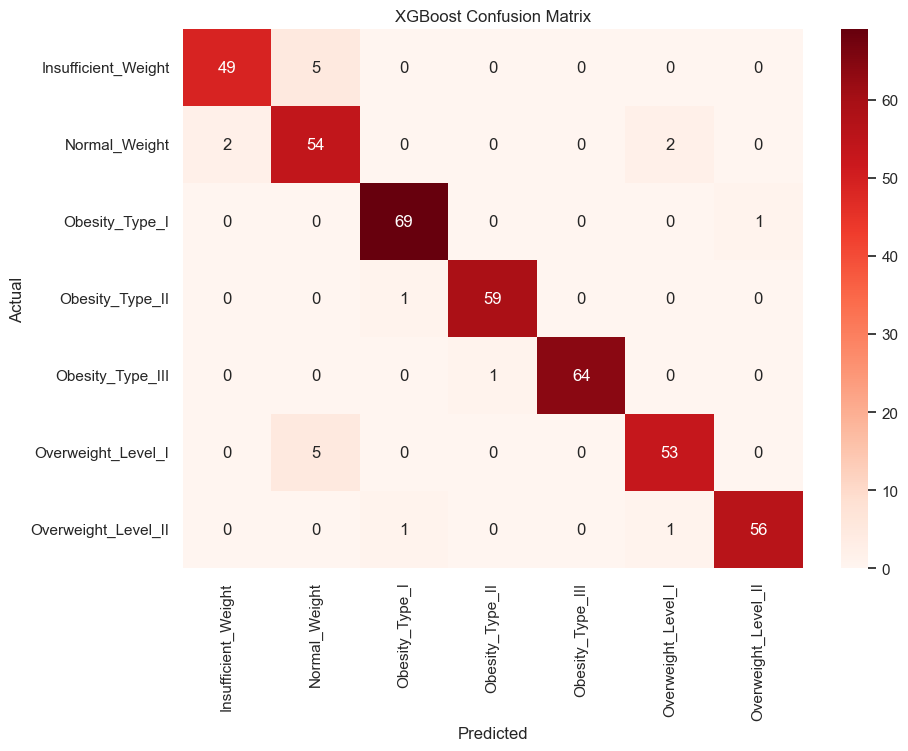

In [72]:
y_pred = clf_xgb.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix')
plt.show()

XGBoost Confusion Matrix (Randomized Search)

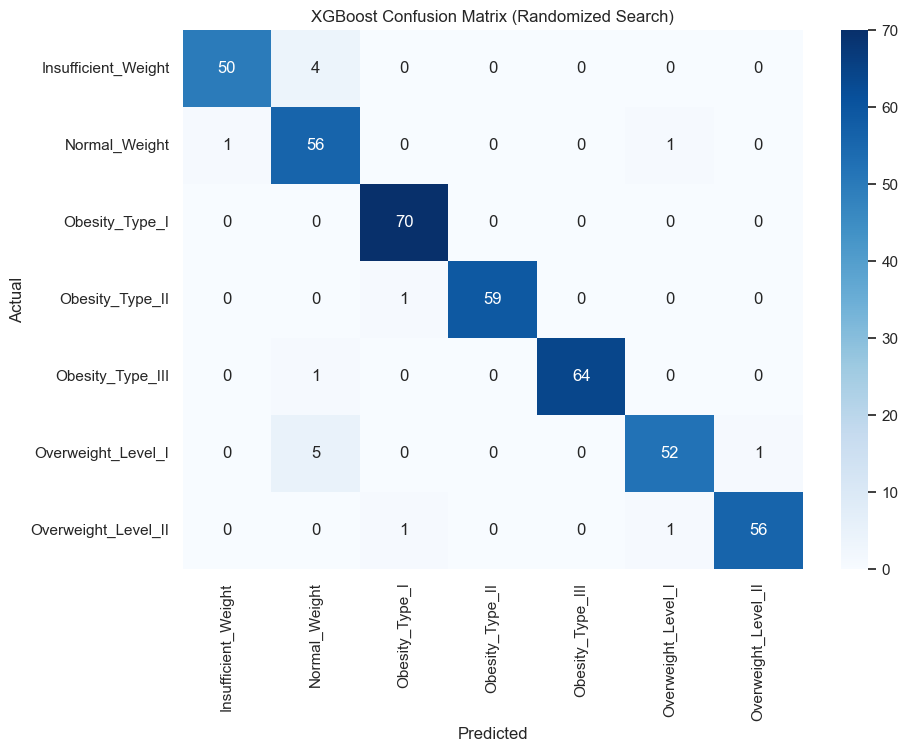

In [73]:
xgb_randomized_best_model = xgb_random_search.best_estimator_

y_pred_random = xgb_randomized_best_model.predict(x_test)

cm_random = confusion_matrix(y_test, y_pred_random)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_random, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix (Randomized Search)')
plt.show()

XGBoost Confusion Matrix (Grid Search)

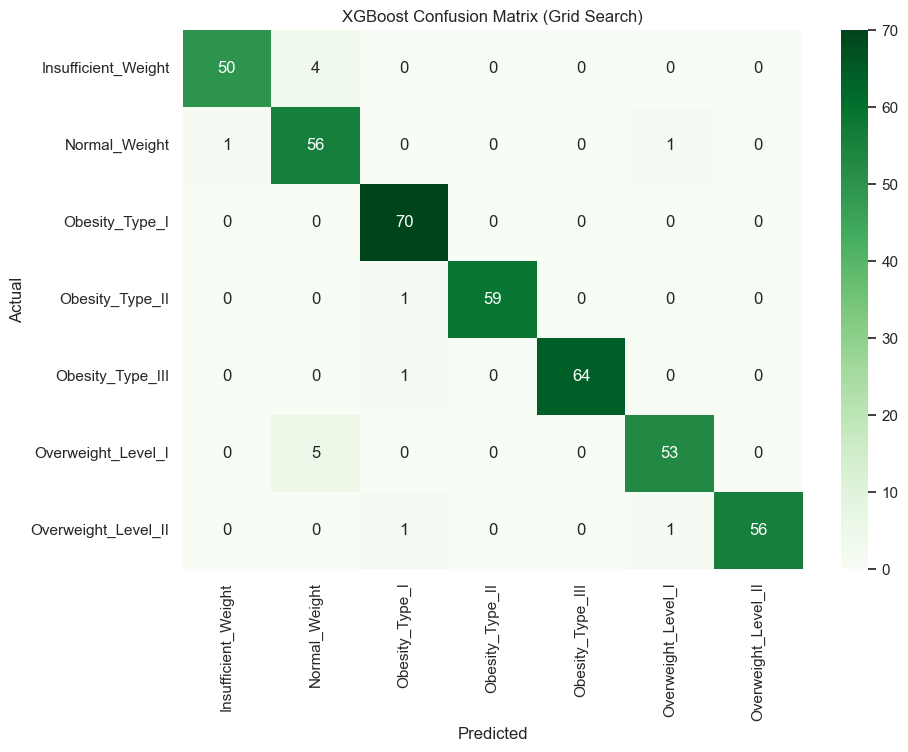

In [74]:
xgb_grid_best_model = xgb_grid_search.best_estimator_

y_pred_grid = xgb_grid_best_model.predict(x_test)

cm_grid = confusion_matrix(y_test, y_pred_grid)

plt.figure(figsize=(10, 7))
sns.heatmap(cm_grid, annot=True, fmt="d", cmap="Greens",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix (Grid Search)')
plt.show()

Random Forest Confusion Matrix

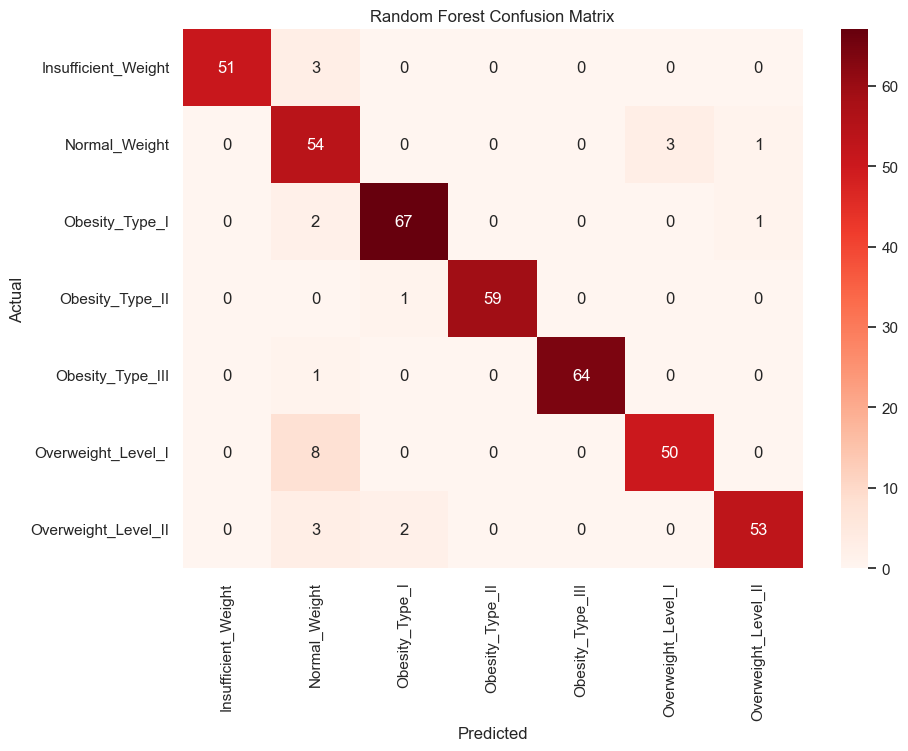

In [75]:
y_pred_rf = rf.predict(x_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(10,7))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Reds", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

Random Forest Confusion Matrix (Randomized Search)

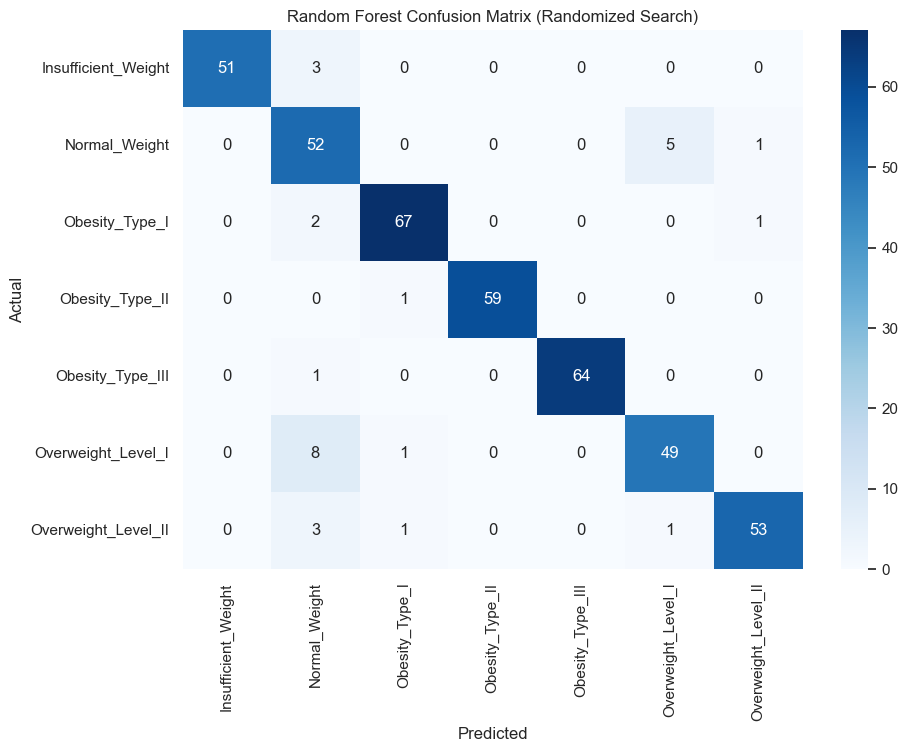

In [76]:
rf_randomized_best_model = random_search_rf.best_estimator_

y_pred_rf_random = rf_randomized_best_model.predict(x_test)
cm_rf_random = confusion_matrix(y_test, y_pred_rf_random)

plt.figure(figsize=(10,7))
sns.heatmap(cm_rf_random, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix (Randomized Search)')
plt.show()

Random Forest Confusion Matrix With Grid Search

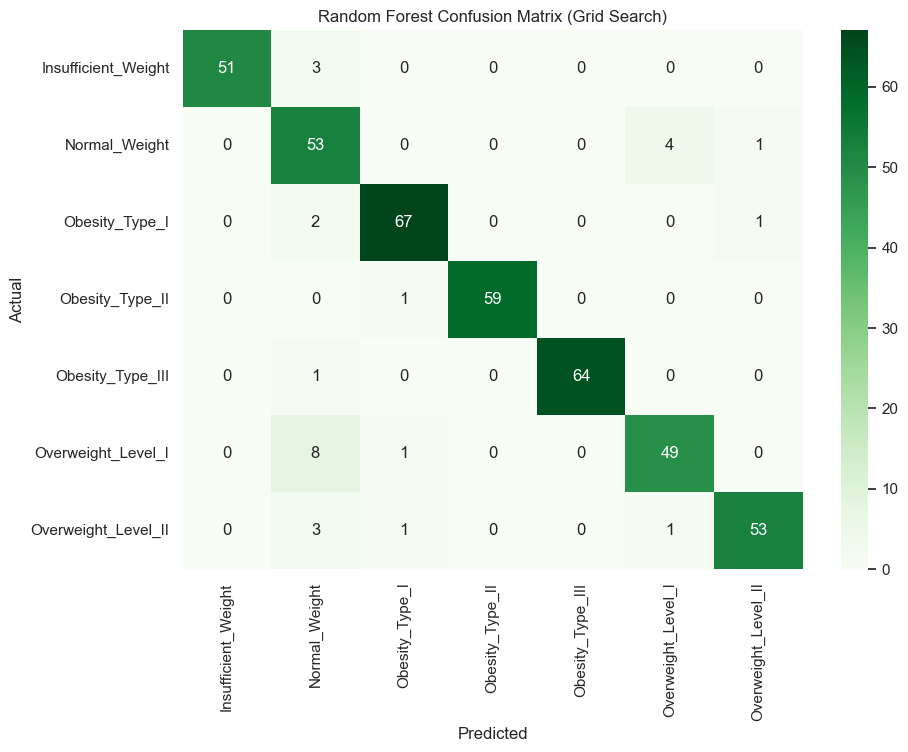

In [77]:
rf_grid_best_model = grid_search_rf.best_estimator_

y_pred_rf_grid = rf_grid_best_model.predict(x_test)
cm_rf_grid = confusion_matrix(y_test, y_pred_rf_grid)

plt.figure(figsize=(10,7))
sns.heatmap(cm_rf_grid, annot=True, fmt="d", cmap="Greens", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix (Grid Search)')
plt.show()

K-Nearest Neighbors Confusion Matrix

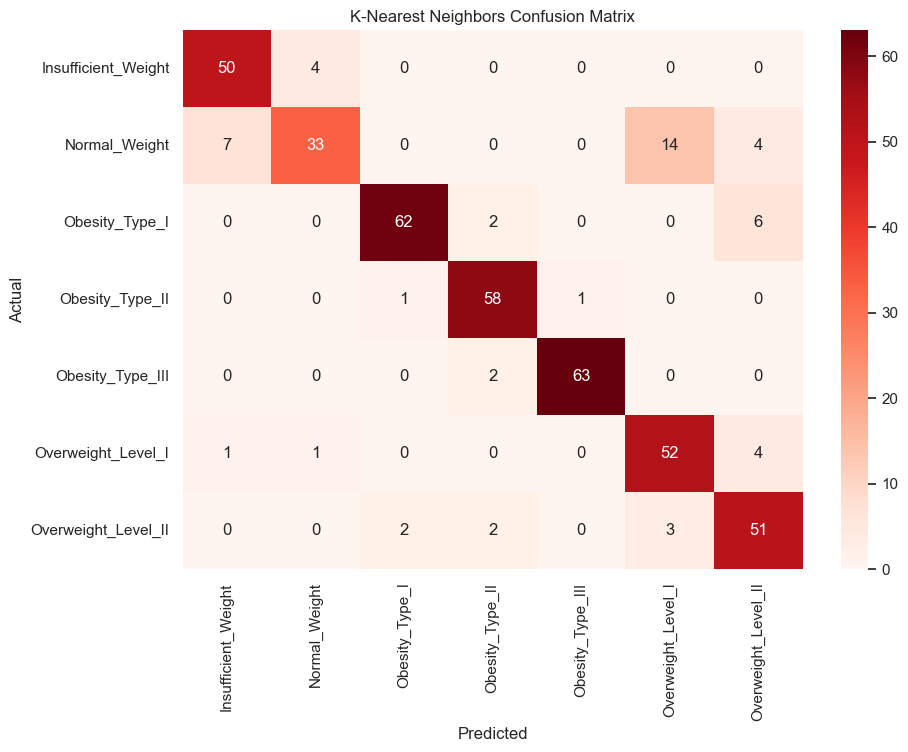

In [78]:
y_pred_knn = knn.predict(x_test)
cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(10,7))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Reds", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('K-Nearest Neighbors Confusion Matrix')
plt.show()

K-Nearest Neighbors Confusion Matrix (Randomized Search)

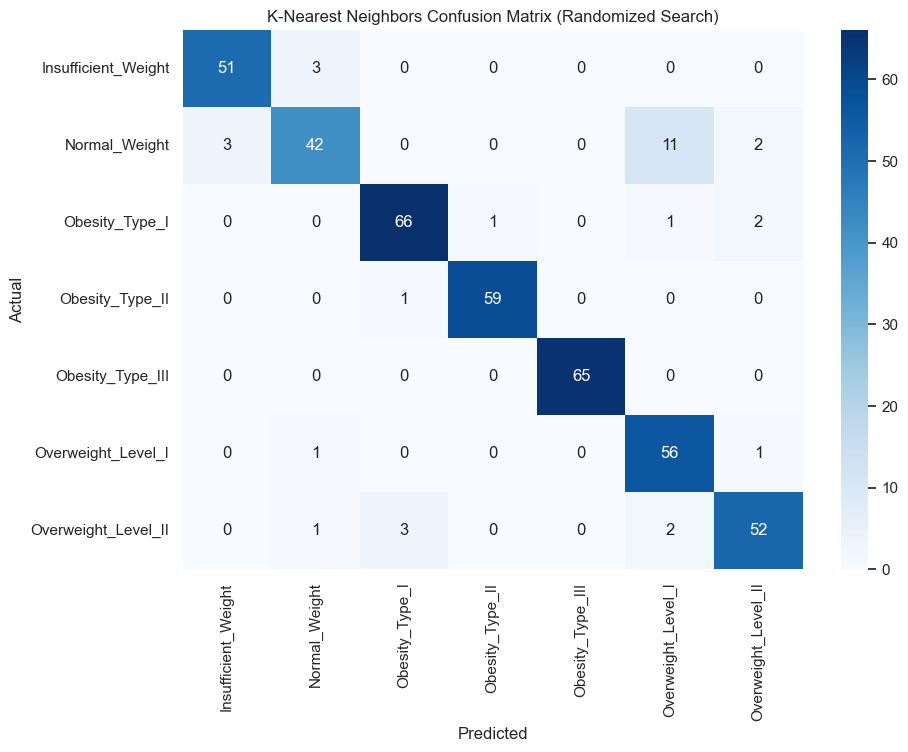

In [79]:
knn_randomized_best_model = random_search_knn.best_estimator_

y_pred_knn_random = knn_randomized_best_model.predict(x_test)
cm_knn_random = confusion_matrix(y_test, y_pred_knn_random)

plt.figure(figsize=(10,7))
sns.heatmap(cm_knn_random, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('K-Nearest Neighbors Confusion Matrix (Randomized Search)')
plt.show()

K-Nearest Neighbors Confusion Matrix (Grid Search)

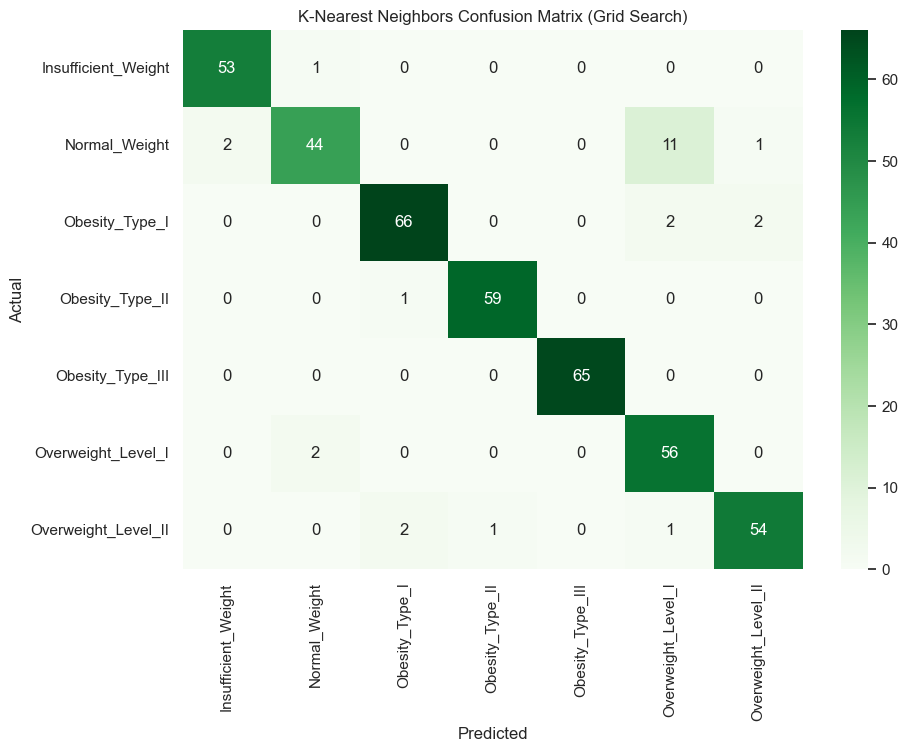

In [80]:
knn_grid_best_model = grid_search_knn.best_estimator_

y_pred_knn_grid = knn_grid_best_model.predict(x_test)
cm_knn_grid = confusion_matrix(y_test, y_pred_knn_grid)

plt.figure(figsize=(10,7))
sns.heatmap(cm_knn_grid, annot=True, fmt="d", cmap="Greens", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('K-Nearest Neighbors Confusion Matrix (Grid Search)')
plt.show()

XGBoost Accuracy and Classification Report

In [81]:
xgb_report = classification_report(y_test, y_pred, target_names=le.classes_)
xgb_accuracy = accuracy_score(y_test, y_pred)

print(f"XGBoost Accuracy: {xgb_accuracy * 100:.2f}%")
print(xgb_report)

XGBoost Accuracy: 95.51%
                     precision    recall  f1-score   support

Insufficient_Weight       0.96      0.91      0.93        54
      Normal_Weight       0.84      0.93      0.89        58
     Obesity_Type_I       0.97      0.99      0.98        70
    Obesity_Type_II       0.98      0.98      0.98        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.95      0.91      0.93        58
Overweight_Level_II       0.98      0.97      0.97        58

           accuracy                           0.96       423
          macro avg       0.96      0.95      0.95       423
       weighted avg       0.96      0.96      0.96       423



XGBoost Accuracy and Classification Report With Randomized Search

In [82]:
xgb_randomized_report = classification_report(y_test, y_pred_random, target_names=le.classes_)
xgb_randomized_accuracy = accuracy_score(y_test, y_pred_random)

print(f"XGBoost Accuracy (Randomized Search): {xgb_randomized_accuracy * 100:.2f}%")
print(xgb_randomized_report)

XGBoost Accuracy (Randomized Search): 96.22%
                     precision    recall  f1-score   support

Insufficient_Weight       0.98      0.93      0.95        54
      Normal_Weight       0.85      0.97      0.90        58
     Obesity_Type_I       0.97      1.00      0.99        70
    Obesity_Type_II       1.00      0.98      0.99        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.96      0.90      0.93        58
Overweight_Level_II       0.98      0.97      0.97        58

           accuracy                           0.96       423
          macro avg       0.96      0.96      0.96       423
       weighted avg       0.96      0.96      0.96       423



XGBoost Accuracy and Classification Report with Grid Search

In [83]:
xgb_grid_report = classification_report(y_test, y_pred_grid, target_names=le.classes_)
xgb_grid_accuracy = accuracy_score(y_test, y_pred_grid)

print(f"XGBoost Accuracy (Grid Search): {xgb_grid_accuracy * 100:.2f}%")
print(xgb_grid_report)

XGBoost Accuracy (Grid Search): 96.45%
                     precision    recall  f1-score   support

Insufficient_Weight       0.98      0.93      0.95        54
      Normal_Weight       0.86      0.97      0.91        58
     Obesity_Type_I       0.96      1.00      0.98        70
    Obesity_Type_II       1.00      0.98      0.99        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.96      0.91      0.94        58
Overweight_Level_II       1.00      0.97      0.98        58

           accuracy                           0.96       423
          macro avg       0.97      0.96      0.96       423
       weighted avg       0.97      0.96      0.96       423



Random Forest Accuracy and Classification Report

In [84]:
rf_report = classification_report(y_test, y_pred_rf, target_names=le.classes_)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")
print(rf_report)

Random Forest Accuracy: 94.09%
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.94      0.97        54
      Normal_Weight       0.76      0.93      0.84        58
     Obesity_Type_I       0.96      0.96      0.96        70
    Obesity_Type_II       1.00      0.98      0.99        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.94      0.86      0.90        58
Overweight_Level_II       0.96      0.91      0.94        58

           accuracy                           0.94       423
          macro avg       0.95      0.94      0.94       423
       weighted avg       0.95      0.94      0.94       423



Random Forest Accuracy and Classification Report With Randomized Search

In [85]:
rf_randomized_report = classification_report(y_test, y_pred_rf_random, target_names=le.classes_)
rf_randomized_accuracy = accuracy_score(y_test, y_pred_rf_random)

print(f"Random Forest Accuracy (Randomized Search): {rf_randomized_accuracy * 100:.2f}%")
print(rf_randomized_report)

Random Forest Accuracy (Randomized Search): 93.38%
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.94      0.97        54
      Normal_Weight       0.75      0.90      0.82        58
     Obesity_Type_I       0.96      0.96      0.96        70
    Obesity_Type_II       1.00      0.98      0.99        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.89      0.84      0.87        58
Overweight_Level_II       0.96      0.91      0.94        58

           accuracy                           0.93       423
          macro avg       0.94      0.93      0.93       423
       weighted avg       0.94      0.93      0.94       423



Random Forest Accuracy and Classification Report With Grid Search

In [86]:
rf_grid_report = classification_report(y_test, y_pred_rf_grid, target_names=le.classes_)
rf_grid_accuracy = accuracy_score(y_test, y_pred_rf_grid)

print(f"Random Forest Accuracy (Grid Search): {rf_grid_accuracy * 100:.2f}%")
print(rf_grid_report)

Random Forest Accuracy (Grid Search): 93.62%
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.94      0.97        54
      Normal_Weight       0.76      0.91      0.83        58
     Obesity_Type_I       0.96      0.96      0.96        70
    Obesity_Type_II       1.00      0.98      0.99        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.91      0.84      0.88        58
Overweight_Level_II       0.96      0.91      0.94        58

           accuracy                           0.94       423
          macro avg       0.94      0.93      0.94       423
       weighted avg       0.94      0.94      0.94       423



K-Nearest Neighbors Accuracy and Classification

In [87]:
knn_report = classification_report(y_test, y_pred_knn, target_names=le.classes_)
knn_accuracy = accuracy_score(y_test, y_pred_knn)

print(f"K-Nearest Neighbors Accuracy: {knn_accuracy * 100:.2f}%")
print(knn_report)

K-Nearest Neighbors Accuracy: 87.23%
                     precision    recall  f1-score   support

Insufficient_Weight       0.86      0.93      0.89        54
      Normal_Weight       0.87      0.57      0.69        58
     Obesity_Type_I       0.95      0.89      0.92        70
    Obesity_Type_II       0.91      0.97      0.94        60
   Obesity_Type_III       0.98      0.97      0.98        65
 Overweight_Level_I       0.75      0.90      0.82        58
Overweight_Level_II       0.78      0.88      0.83        58

           accuracy                           0.87       423
          macro avg       0.87      0.87      0.87       423
       weighted avg       0.88      0.87      0.87       423



K-Nearest Neighbors Accuracy and Classification With Randomized Search

In [88]:
knn_randomized_report = classification_report(y_test, y_pred_knn_random, target_names=le.classes_)
knn_randomized_accuracy = accuracy_score(y_test, y_pred_knn_random)

print(f"K-Nearest Neighbors Accuracy (Randomized Search): {knn_randomized_accuracy * 100:.2f}%")
print(knn_randomized_report)

K-Nearest Neighbors Accuracy (Randomized Search): 92.43%
                     precision    recall  f1-score   support

Insufficient_Weight       0.94      0.94      0.94        54
      Normal_Weight       0.89      0.72      0.80        58
     Obesity_Type_I       0.94      0.94      0.94        70
    Obesity_Type_II       0.98      0.98      0.98        60
   Obesity_Type_III       1.00      1.00      1.00        65
 Overweight_Level_I       0.80      0.97      0.88        58
Overweight_Level_II       0.91      0.90      0.90        58

           accuracy                           0.92       423
          macro avg       0.93      0.92      0.92       423
       weighted avg       0.93      0.92      0.92       423



K-Nearest Neighbors Accuracy and Classification With Grid Search

In [89]:
knn_grid_report = classification_report(y_test, y_pred_knn_grid, target_names=le.classes_)
knn_grid_accuracy = accuracy_score(y_test, y_pred_knn_grid)

print(f"K-Nearest Neighbors Accuracy (Grid Search): {knn_grid_accuracy * 100:.2f}%")
print(knn_grid_report)

K-Nearest Neighbors Accuracy (Grid Search): 93.85%
                     precision    recall  f1-score   support

Insufficient_Weight       0.96      0.98      0.97        54
      Normal_Weight       0.94      0.76      0.84        58
     Obesity_Type_I       0.96      0.94      0.95        70
    Obesity_Type_II       0.98      0.98      0.98        60
   Obesity_Type_III       1.00      1.00      1.00        65
 Overweight_Level_I       0.80      0.97      0.88        58
Overweight_Level_II       0.95      0.93      0.94        58

           accuracy                           0.94       423
          macro avg       0.94      0.94      0.94       423
       weighted avg       0.94      0.94      0.94       423



Model Performance Comparison

C:\Users\HELLO\AppData\Local\Temp\ipykernel_13508\4238874962.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Model', y=metric_name, data=df, palette='deep')


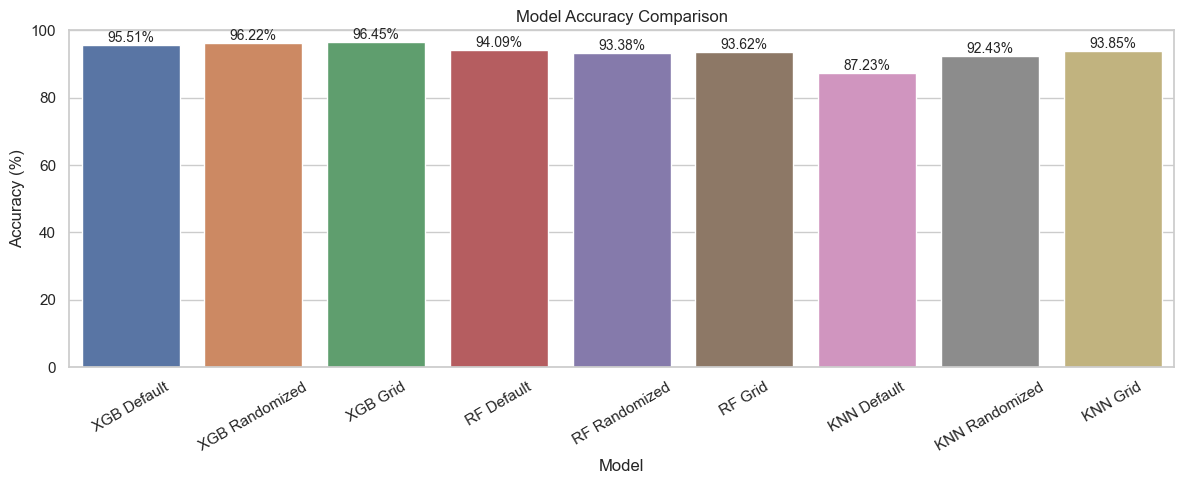

C:\Users\HELLO\AppData\Local\Temp\ipykernel_13508\4238874962.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Model', y=metric_name, data=df, palette='deep')


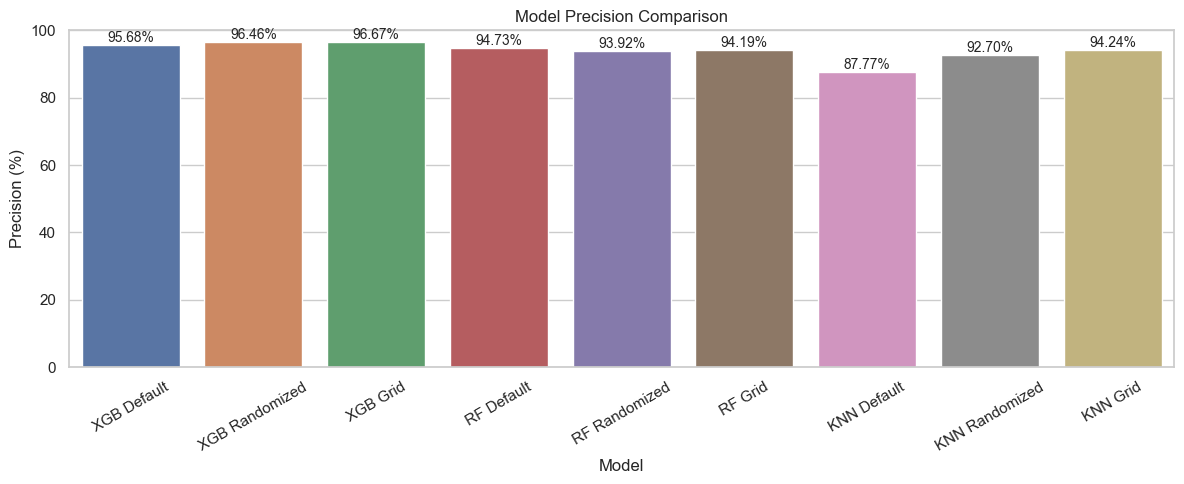

C:\Users\HELLO\AppData\Local\Temp\ipykernel_13508\4238874962.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Model', y=metric_name, data=df, palette='deep')


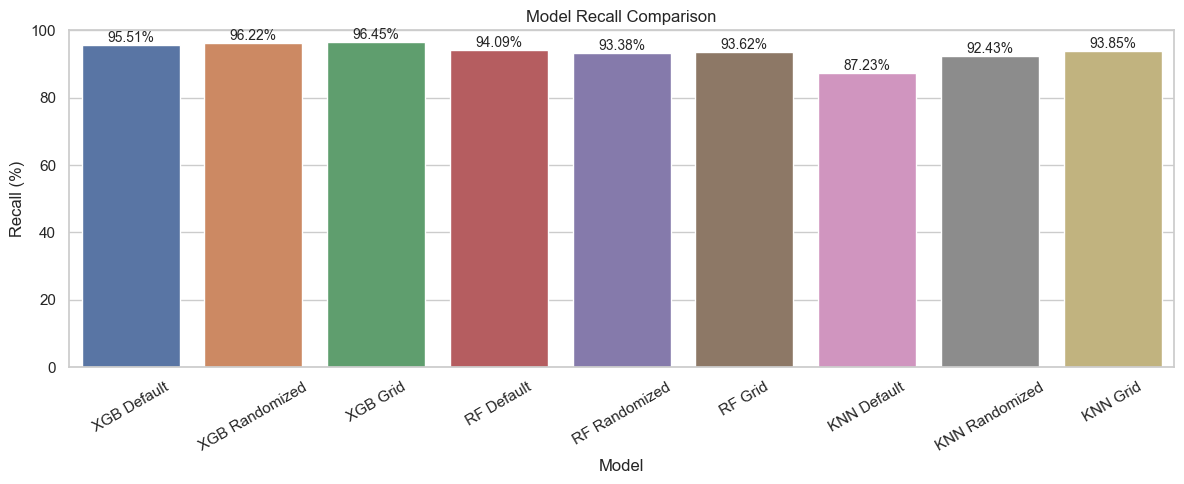

C:\Users\HELLO\AppData\Local\Temp\ipykernel_13508\4238874962.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Model', y=metric_name, data=df, palette='deep')


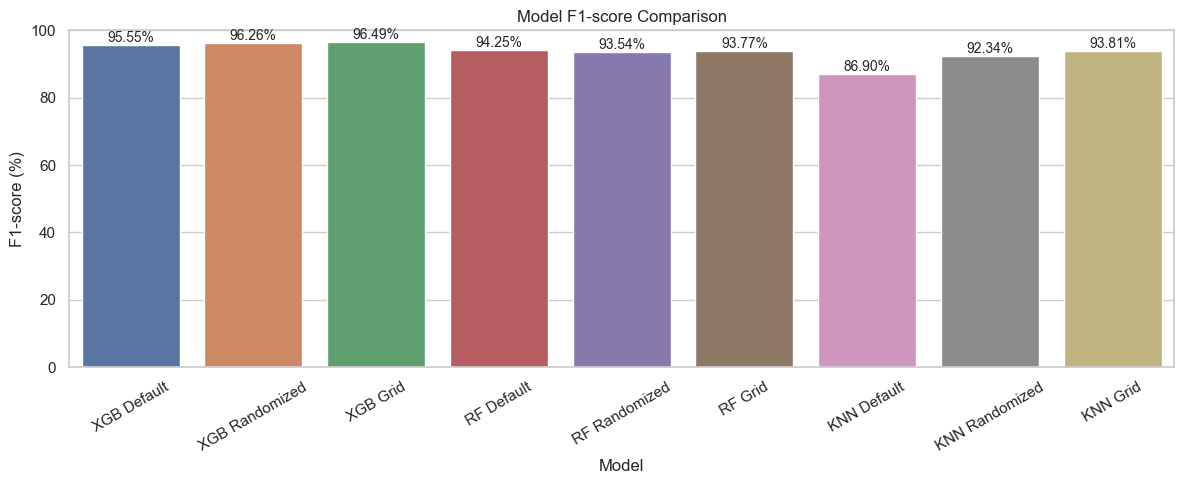

In [94]:
def get_metrics_from_report(report):
    report_dict = classification_report(y_test, y_pred, output_dict=True, target_names=le.classes_)
    return {
        'precision': report_dict['weighted avg']['precision'] * 100,
        'recall': report_dict['weighted avg']['recall'] * 100,
        'f1-score': report_dict['weighted avg']['f1-score'] * 100
    }

df_metrics = pd.DataFrame({
    'Model': [
        'XGB Default', 'XGB Randomized', 'XGB Grid',
        'RF Default', 'RF Randomized', 'RF Grid',
        'KNN Default', 'KNN Randomized', 'KNN Grid'
    ],
    'accuracy': [
        accuracy_score(y_test, y_pred) * 100,
        accuracy_score(y_test, y_pred_random) * 100,
        accuracy_score(y_test, y_pred_grid) * 100,
        accuracy_score(y_test, y_pred_rf) * 100,
        accuracy_score(y_test, y_pred_rf_random) * 100,
        accuracy_score(y_test, y_pred_rf_grid) * 100,
        accuracy_score(y_test, y_pred_knn) * 100,
        accuracy_score(y_test, y_pred_knn_random) * 100,
        accuracy_score(y_test, y_pred_knn_grid) * 100
    ],
    'precision': [
        precision_score(y_test, y_pred, average='weighted') * 100,
        precision_score(y_test, y_pred_random, average='weighted') * 100,
        precision_score(y_test, y_pred_grid, average='weighted') * 100,
        precision_score(y_test, y_pred_rf, average='weighted') * 100,
        precision_score(y_test, y_pred_rf_random, average='weighted') * 100,
        precision_score(y_test, y_pred_rf_grid, average='weighted') * 100,
        precision_score(y_test, y_pred_knn, average='weighted') * 100,
        precision_score(y_test, y_pred_knn_random, average='weighted') * 100,
        precision_score(y_test, y_pred_knn_grid, average='weighted') * 100
    ],
    'recall': [
        recall_score(y_test, y_pred, average='weighted') * 100,
        recall_score(y_test, y_pred_random, average='weighted') * 100,
        recall_score(y_test, y_pred_grid, average='weighted') * 100,
        recall_score(y_test, y_pred_rf, average='weighted') * 100,
        recall_score(y_test, y_pred_rf_random, average='weighted') * 100,
        recall_score(y_test, y_pred_rf_grid, average='weighted') * 100,
        recall_score(y_test, y_pred_knn, average='weighted') * 100,
        recall_score(y_test, y_pred_knn_random, average='weighted') * 100,
        recall_score(y_test, y_pred_knn_grid, average='weighted') * 100
    ],
    'f1-score': [
        f1_score(y_test, y_pred, average='weighted') * 100,
        f1_score(y_test, y_pred_random, average='weighted') * 100,
        f1_score(y_test, y_pred_grid, average='weighted') * 100,
        f1_score(y_test, y_pred_rf, average='weighted') * 100,
        f1_score(y_test, y_pred_rf_random, average='weighted') * 100,
        f1_score(y_test, y_pred_rf_grid, average='weighted') * 100,
        f1_score(y_test, y_pred_knn, average='weighted') * 100,
        f1_score(y_test, y_pred_knn_random, average='weighted') * 100,
        f1_score(y_test, y_pred_knn_grid, average='weighted') * 100
    ]
})

def plot_metric(df, metric_name):
    plt.figure(figsize=(12, 5))
    ax = sns.barplot(x='Model', y=metric_name, data=df, palette='deep')
    plt.title(f'Model {metric_name.capitalize()} Comparison')
    plt.ylim(0, 100)
    plt.ylabel(f'{metric_name.capitalize()} (%)')
    plt.xticks(rotation=30)

    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}%', 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()

for metric in ['accuracy', 'precision', 'recall', 'f1-score']:
    plot_metric(df_metrics, metric)